# Tutorial 9: ISH-based STARmap dataset

Here we present our re-analysis of the ISH-based mouse visual cortex STARmap dataset (See Fig. S16 of the STAGATE paper for details).

The raw data are available at https://www.dropbox.com/sh/f7ebheru1lbz91s/AADm6D54GSEFXB1feRy6OSASa/visual_1020/20180505_BY3_1kgenes?dl=0&subfolder_nav_tracking=1.

The annotation information and the processed SCANPY object are provided at https://drive.google.com/drive/folders/1I1nxheWlc2RXSdiv24dex3YRaEh780my?usp=sharing.

## Preparation

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")

In [2]:
import STAGATE

In [3]:
adata = sc.read('STARmap_20180505_BY3_1k.h5ad')

In [4]:
adata.obs.head()

,Total_counts,X,Y,label
Cell_9,310,4980.777664,-49.771247,L6
Cell_10,533,8729.177425,-53.473114,L4
Cell_13,452,11547.566359,-46.315493,L2/3
Cell_15,288,3280.980264,-37.612811,L6
Cell_16,457,7582.793601,-45.350312,L4


In [5]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

## Constructing the spatial network

------Calculating spatial graph...
The graph contains 7838 edges, 1207 cells.
6.4938 neighbors per cell on average.


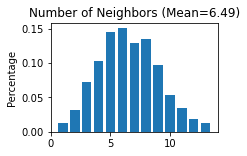

In [6]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=400)
STAGATE.Stats_Spatial_Net(adata)

## Running STAGATE

In [7]:
adata = STAGATE.train_STAGATE(adata, alpha=0)

Size of Input:  (1207, 1020)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


100%|██████████| 500/500 [00:21<00:00, 22.79it/s]


In [8]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)

In [9]:
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=7)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 5.4.10
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


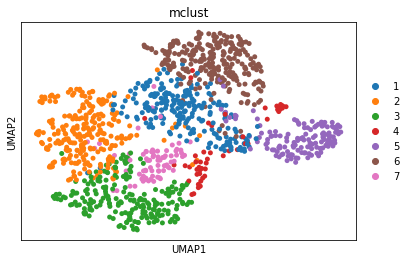

In [10]:
sc.pl.umap(adata, color='mclust')

<AxesSubplot:title={'center':'mclust'}, xlabel='spatial1', ylabel='spatial2'>

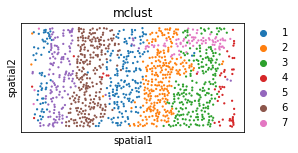

In [11]:
plt.rcParams["figure.figsize"] = (4, 2)
sc.pl.embedding(adata, basis="spatial", color='mclust', s=20, show=False)#, legend_loc=False)

<AxesSubplot:title={'center':'label'}, xlabel='spatial1', ylabel='spatial2'>

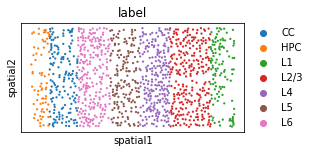

In [14]:
# layer annotation
plt.rcParams["figure.figsize"] = (4, 2)
sc.pl.embedding(adata, basis="spatial", color='label', s=20, show=False)#, legend_loc=False)

## Calculate ARI

In [15]:
from sklearn.metrics.cluster import adjusted_rand_score

In [16]:
adjusted_rand_score(adata.obs['label'], adata.obs['mclust'])

0.5441835384954468